# Title: Simple Logistic Regression for 507 Project
## Author: Diana Liang
## Date: 4/15/2020

In [2]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('food_health.csv')

In [4]:
X = data.iloc[:, 1:]
Y = data.iloc[:, 0]

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1,
                                                   random_state=0)
miss_train = IterativeImputer(max_iter=100, random_state=0)
new_X_train = miss_train.fit_transform(X_train)
miss_test = IterativeImputer(max_iter=100, random_state=0)
new_X_test = miss_test.fit_transform(X_test)

In [6]:
train_acc = []
for c in [0.01, 0.1, 1, 10]:
    model = LogisticRegression(C=c, multi_class='multinomial', max_iter=5000, random_state=0)
    scores = cross_val_score(model, new_X_train, Y_train, scoring='accuracy',
                            cv=8)
    train_acc.append(scores.mean())

c:\users\luxau\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  % (min_groups, self.n_splits)), UserWarning)
c:\users\luxau\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  % (min_groups, self.n_splits)), UserWarning)
c:\users\luxau\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  % (min_groups, self.n_splits)), UserWarning)
c:\users\luxau\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  % (min_groups, self.n_splits)), U

Text(0, 0.5, 'Accuracy')

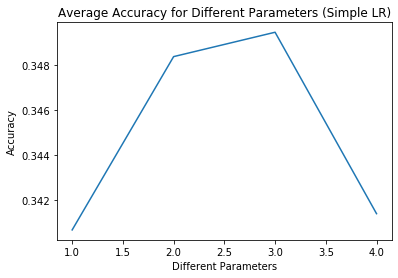

In [7]:
plt.plot(range(1,5), train_acc)
plt.title("Average Accuracy for Different Parameters (Simple LR)")
plt.xlabel("Different Parameters")
plt.ylabel("Accuracy")
#plt.savefig('lr_acc.png')

In [10]:
model = LogisticRegression(C=1, multi_class='multinomial',
                           max_iter=5000, random_state=0)
model.fit(new_X_train, Y_train)
Y_pred = model.predict(new_X_test)
accuracy_score(Y_test, Y_pred)

0.37021046950890446

Text(33.0, 0.5, 'Predicted Health')

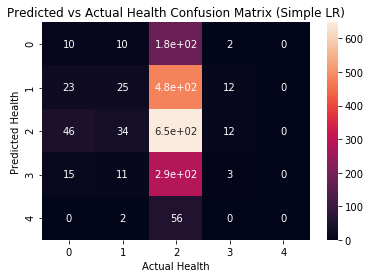

In [11]:
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True)
plt.title("Predicted vs Actual Health Confusion Matrix (Simple LR)")
plt.xlabel("Actual Health")
plt.ylabel("Predicted Health")
#plt.savefig("lr_con_mat.png")